In [6]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-inpainting").to("mps")


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

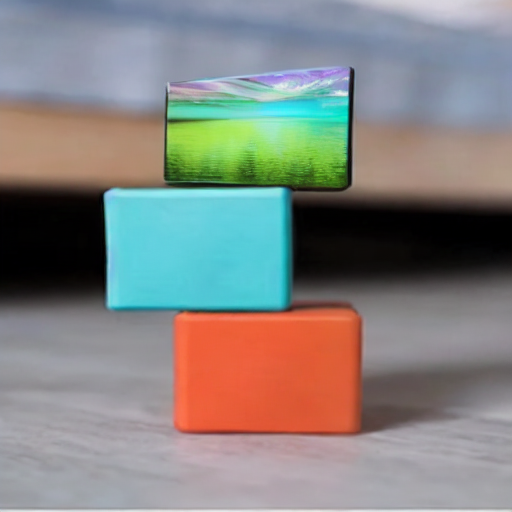

In [20]:
from PIL import Image
from IPython.display import display


image = Image.open("images/image_cubes.png").convert("RGB").resize((224,224))
mask = Image.open("images/masked_image_cube_haut.png").convert("L").resize((224,224))

positive_prompt = "Full HD, 4K, high quality, high resolution, photorealistic"
negative_prompt = ("bad anatomy, bad proportions, blurry, cropped, deformed, disfigured, duplicate, "
                   "error, extra limbs, gross proportions, jpeg artifacts, long neck, low quality, lowres, "
                   "malformed, morbid, mutated, mutilated, out of frame, ugly, worst quality")


result = pipe(
    prompt=positive_prompt,
    negative_prompt=negative_prompt,
    image=image,
    mask_image=mask,
    guidance_scale=7.5,
    num_inference_steps=50,
)
inpainted_image = result.images[0]
inpainted_image.save(f"inpaintings/image_cube_haut.png")
display(inpainted_image)

  0%|          | 0/50 [00:00<?, ?it/s]

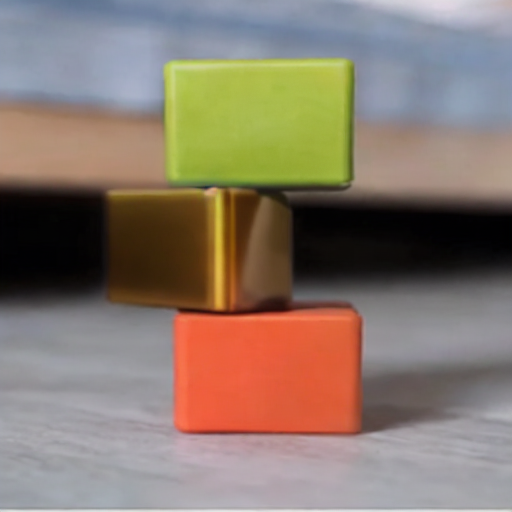

In [17]:
image = Image.open("images/image_cubes.png").convert("RGB").resize((224,224))
mask = Image.open("images/masked_image_cube_milieu.png").convert("L").resize((224,224))


result = pipe(
    prompt=positive_prompt,
    negative_prompt=negative_prompt,
    image=image,
    mask_image=mask,
    guidance_scale=7.5,
    num_inference_steps=50,
)
inpainted_image = result.images[0]
inpainted_image.save(f"inpaintings/image_cube_milieu.png")
display(inpainted_image)

  0%|          | 0/50 [00:00<?, ?it/s]

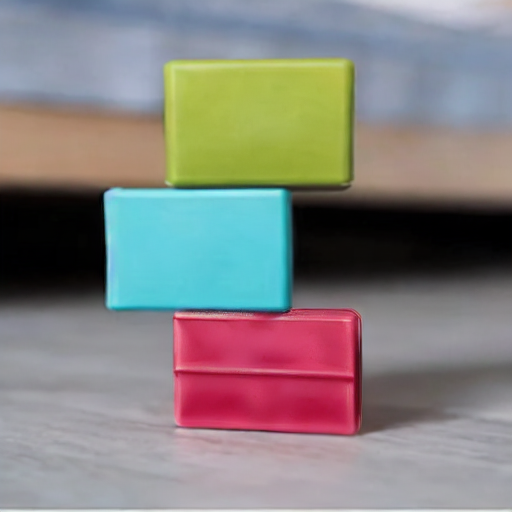

In [18]:
image = Image.open("images/image_cubes.png").convert("RGB").resize((224,224))
mask = Image.open("images/masked_image_cube_bas.png").convert("L").resize((224,224))

positive_prompt = "Full HD, 4K, high quality, high resolution, photorealistic"
negative_prompt = ("bad anatomy, bad proportions, blurry, cropped, deformed, disfigured, duplicate, "
                   "error, extra limbs, gross proportions, jpeg artifacts, long neck, low quality, lowres, "
                   "malformed, morbid, mutated, mutilated, out of frame, ugly, worst quality")


result = pipe(
    prompt=positive_prompt,
    negative_prompt=negative_prompt,
    image=image,
    mask_image=mask,
    guidance_scale=7.5,
    num_inference_steps=50,
)
inpainted_image = result.images[0]
inpainted_image.save(f"inpaintings/image_cube_bas.png")
display(inpainted_image)

In [1]:
from utils.diversity_score import combined_score
from PIL import Image

image_original = Image.open("images/image_cubes.png").convert("RGB").resize((224,224))
image_inpainted_haut = Image.open("inpaintings/image_cube_haut.png").convert("RGB").resize((224,224))
image_inpainted_milieu = Image.open("inpaintings/image_cube_milieu.png").convert("RGB").resize((224,224))
image_inpainted_bas = Image.open("inpaintings/image_cube_bas.png").convert("RGB").resize((224,224))

combined_score_haut = combined_score([image_inpainted_haut],image_original)
combined_score_milieu = combined_score([image_inpainted_milieu],image_original)
combined_score_bas = combined_score([image_inpainted_bas],image_original)

print("combined_score_haut",combined_score_haut)
print("combined_score_milieu",combined_score_milieu)
print("combined_score_bas",combined_score_bas)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/Users/damienthai/Desktop/Telecom_Paris/P3/Fairness/visual_jenga/venv_jenga/lib/python3.12/site-packages/timm/models/_factory.py:126: UserWarning: Mapping deprecated model name vit_small_patch8_224_dino to current vit_small_patch8_224.dino.
  model = create_fn(


combined_score_haut 0.2072715163230896
combined_score_milieu 0.13129621744155884
combined_score_bas 0.07241636514663696


  0%|          | 0/50 [00:00<?, ?it/s]

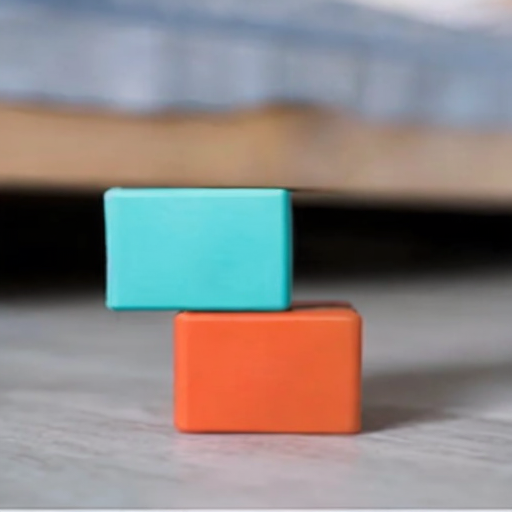

In [9]:
image = Image.open("images/image_cubes.png").convert("RGB").resize((224,224))
mask = Image.open("images/masked_image_cube_haut.png").convert("L").resize((224,224))

positive_prompt = "a realistic continuation of the background"

result = pipe(
    prompt=positive_prompt,
    image=image,
    mask_image=mask,
    guidance_scale=7.5,
    num_inference_steps=50,
)
inpainted_image = result.images[0]
inpainted_image.save(f"inpaintings/image_cube_haut.png")
display(inpainted_image)

  0%|          | 0/50 [00:00<?, ?it/s]

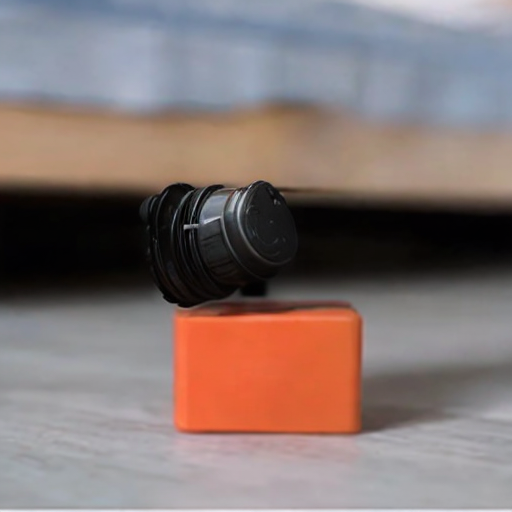

In [ ]:
image = Image.open("inpaintings/image_cube_haut.png").convert("RGB").resize((224,224))
mask = Image.open("images/masked_image_cube_milieu.png").convert("L").resize((224,224))

positive_prompt = "background"

result = pipe(
    prompt=positive_prompt,
    image=image,
    mask_image=mask,
    guidance_scale=7.5,
    num_inference_steps=50,
)
inpainted_image = result.images[0]
inpainted_image.save(f"inpaintings/image_cube_milieu.png")
display(inpainted_image)